# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Bayesian Networks: tabu algorithm</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Genetic predictors](#3)
    * [Physical predictors](#5)
    * [Target variables](#4)
* [Construction of the Bayesian network using the tabu algorithm](#2)
* [Conditional probabilities](#6)
    * [Conditional probabilities for  W1.2MedDifWRelFFM1Bin = 0](#7)
    * [Conditional probabilities for  W1.2MedDifWRelFFM1Bin = 1](#8)

In this notebook we will use the snp related to the target variable ('rs11144134','rs7191721','rs6968554','rs1800497', 'rs1572312') obtained in the notebook 6_snp_bayesian_networks_power_FFM1 along with the physical predictors.

## Loading data <a class="anchor" id="1"></a>

* [Returning to the index of contents](#index)

### Genetic predictors <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In [1]:
handle_genetic <- read.csv('handle_genetic_fusion_28_04_20.csv')
head(handle_genetic)

rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,rs10497520,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,C:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,C:C,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,C:C,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,C:C,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,C:C,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [2]:
handle_genetic <- handle_genetic[, c('rs11144134','rs7191721','rs6968554','rs1800497','rs1572312' )]
head(handle_genetic)

rs11144134,rs7191721,rs6968554,rs1800497,rs1572312
C:T,G:G,A:A,C:C,C:C
T:T,A:A,G:G,C:C,C:C
C:T,G:G,G:G,C:T,C:C
T:T,A:G,A:A,C:T,C:C
T:T,A:G,A:G,C:C,C:C
T:T,A:G,A:G,C:T,C:C


### Physical predictors <a class="anchor" id="5"></a>

* [Returning to the index of contents](#index)

In [3]:
handle_physical <- read.csv('handle_physical_fusion_31_03_20.csv',row.name = 1)
head(handle_physical)
names(handle_physical)

,W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,W1t5Lac,...,PerCue,PerCin,FM1,FM2,X.FFM1,X.FFM2,FFM1,FFM2,FFMI1,FFMI2
0,109,92,1.9,133,95,2.3,8,59,90,4.7,...,31.0,65.0,7.883768,8.432778,83.04566,81.86499,38.61623,38.06722,16.71409,16.47646
4,84,90,3.4,151,82,4.3,8,74,97,6.3,...,36.0,67.5,6.914187,10.373099,87.86985,81.80158,50.08581,46.62690,17.33073,16.13388
7,136,98,1.3,164,97,2.8,10,121,97,9.0,...,31.0,65.5,4.917710,10.003592,90.45105,80.57555,46.58229,41.49641,17.74969,15.81177
8,120,97,1.8,150,76,4.2,8,141,98,9.7,...,35.5,68.5,11.222758,14.984471,81.60204,75.43529,49.77724,46.01553,18.50730,17.10869
9,62,97,2.8,172,91,4.9,9,119,88,10.8,...,33.5,69.8,15.642411,16.063989,72.55717,71.81756,41.35759,40.93601,16.56689,16.39802
11,103,99,2.4,174,96,3.6,10,115,99,9.3,...,35.0,69.0,8.131694,11.411066,85.73387,79.98059,48.86831,45.58893,17.94979,16.74525


[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "PliegueMus" "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"    
[36] "FM1"        "FM2"        "X.FFM1"     "X.FFM2"     "FFM1"      
[41] "FFM2"       "FFMI1"      "FFMI2"

To avoid interference with the predictors related to FFM1 and similars, we eliminated the predictors that in their name contain the FM substring.

In [4]:
handle_physical <- handle_physical[!grepl('FM',names(handle_physical))] 
names(handle_physical)

[1] "W1Fc"       "W1Ox"       "W1Lac"      "W1tFc"      "W1tOx"     
 [6] "W1tLac"     "W1tBorg"    "W1t5Fc"     "W1t5Ox"     "W1t5Lac"   
[11] "W2tFc"      "W2tOx"      "W2tLac"     "W2tBorg"    "W2t5Fc"    
[16] "W2t5Ox"     "W2t5Lac"    "W2t10Fc"    "W2t10Ox"    "W2t10Lac"  
[21] "Sumat"      "Peso"       "Edad"       "Altura"     "PlieguePec"
[26] "PliegueAx"  "PliegueTri" "PliegueSub" "PliegueAbd" "PliegueSup"
[31] "PliegueMus" "tpcgrasa1"  "tpcgrasa2"  "PerCue"     "PerCin"

To avoid redundances between fat folds predictors, we eliminated Sumat.

In [5]:
handle_physical <- handle_physical[!grepl('Sumat',names(handle_physical))] 

In [6]:
summary(handle_physical)

      W1Fc             W1Ox           W1Lac           W1tFc      
 Min.   : 62.00   Min.   :69.00   Min.   :0.800   Min.   : 88.0  
 1st Qu.: 90.25   1st Qu.:91.00   1st Qu.:1.500   1st Qu.:157.8  
 Median :105.50   Median :97.00   Median :2.000   Median :171.5  
 Mean   :106.87   Mean   :94.34   Mean   :2.123   Mean   :164.2  
 3rd Qu.:120.75   3rd Qu.:98.00   3rd Qu.:2.675   3rd Qu.:176.8  
 Max.   :162.00   Max.   :99.00   Max.   :4.500   Max.   :194.0  
     W1tOx           W1tLac         W1tBorg           W1t5Fc          W1t5Ox  
 Min.   :61.00   Min.   :1.700   Min.   : 7.000   Min.   : 59.0   Min.   :51  
 1st Qu.:87.00   1st Qu.:3.400   1st Qu.: 8.250   1st Qu.:111.5   1st Qu.:95  
 Median :92.00   Median :3.900   Median : 9.000   Median :122.5   Median :98  
 Mean   :90.61   Mean   :3.987   Mean   : 9.171   Mean   :120.8   Mean   :95  
 3rd Qu.:97.00   3rd Qu.:4.675   3rd Qu.:10.000   3rd Qu.:133.0   3rd Qu.:98  
 Max.   :99.00   Max.   :6.700   Max.   :10.000   Max.   :155.0 

As can be seen from the summary of physical variables they are all of a numerical type, and to be able to use Bayesian Network algorithms we need them to be of a categorical type. Since there is no established criterion we will apply the same as on the target variable, we will use the median as threshold to move to category 1 (high value) or category 0 (low value).

In [7]:
for (i in 1 : length(handle_physical)){
    handle_physical[,i] <- factor(as.numeric(handle_physical[,i]>=median(handle_physical[,i])))
}

In [8]:
head(handle_physical)

,W1Fc,W1Ox,W1Lac,W1tFc,W1tOx,W1tLac,W1tBorg,W1t5Fc,W1t5Ox,W1t5Lac,...,PliegueAx,PliegueTri,PliegueSub,PliegueAbd,PliegueSup,PliegueMus,tpcgrasa1,tpcgrasa2,PerCue,PerCin
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,1,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,1,1,1,0,0
9,0,1,1,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,0,0
11,0,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,1,1,1,0,0


### Target variables <a class="anchor" id="4"></a>

* [Returning to the index of contents](#index)

In [9]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [10]:
ind_med <- cbind(handle_target['W1.2MedDifWRelFFM1'],handle_genetic, handle_physical)

rownames(ind_med) <- NULL

W1.2MedDifWRelFFM1Bin <- factor(as.numeric(handle_target['W1.2MedDifWRelFFM1']>=median(handle_target$W1.2MedDifWRelFFM1)))

ind_med <- cbind(W1.2MedDifWRelFFM1Bin, ind_med)

ind_med$W1.2MedDifWRelFFM1 <- NULL


## Construction of the Bayesian network using the tabu algorithm<a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

In [11]:
library(bnlearn)

Warning message:
"package 'bnlearn' was built under R version 3.6.2"
Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



In [12]:
set.seed(10)
tabu <- tabu(ind_med, tabu = 500,iss = 10, score = 'bde')

In [13]:
bnlearn::score(tabu, data = ind_med,type = 'bde')

[1] -1844.151

In [14]:
set.seed(1)
rnd <- random.graph(nodes = names(ind_med))
modelstring(rnd)

[1] "[W1.2MedDifWRelFFM1Bin][rs11144134][rs7191721][rs6968554][rs1800497][W1Fc][W1Ox][W1Lac][W1tOx][W1tLac][W1tBorg][W1t5Fc][W1t5Ox][W2tFc][W2tOx][W2tLac][W2t5Fc][W2t5Ox][W2t10Ox][Altura][PlieguePec][PliegueAx][PliegueSub][PliegueSup][tpcgrasa2][rs1572312|rs6968554][W1tFc|rs11144134:W1Lac][W1t5Lac|W1Fc][W2tBorg|W1tBorg][W2t5Lac|rs6968554:W1t5Ox:W2tOx:W2tLac][W2t10Lac|W1t5Fc:W2tFc][Edad|W1.2MedDifWRelFFM1Bin:W2tLac][PliegueTri|Altura][PliegueMus|Altura:PliegueAx][tpcgrasa1|W1Ox][W2t10Fc|W1Lac:W1t5Lac][PliegueAbd|W2tBorg][PerCue|PlieguePec:PliegueMus][PerCin|W2t10Lac:tpcgrasa1][Peso|W1t5Lac:W2tOx:W2t10Fc]"

In [15]:
bnlearn::score(rnd, data = ind_med, type = 'bde')

[1] -2407.287

The score obtained surpasses that obtained with the random model, indicating that we are on the right track.

Let's look at the relationships of significance according to the $\chi^2$ independence test

In [16]:
sig_tabu <- arc.strength(tabu, data = ind_med, criterion = "x2") 
head(sig_tabu)

from,to,strength
Peso,PerCue,3.176695e-10
W1tFc,W2tFc,1.546836e-09
W2t5Fc,W2t10Fc,1.574419e-05
PliegueAx,PliegueAbd,3.737718e-10
PliegueTri,tpcgrasa1,2.294462e-09
PliegueAbd,PliegueSup,5.420913e-02


Again we keep the significant relationships, which are less than 0.05

In [17]:
sig_tabu_imp <- sig_tabu[sig_tabu$strength < 0.05,]
head(sig_tabu_imp)

,from,to,strength
1,Peso,PerCue,3.176695e-10
2,W1tFc,W2tFc,1.546836e-09
3,W2t5Fc,W2t10Fc,1.574419e-05
4,PliegueAx,PliegueAbd,3.737718e-10
5,PliegueTri,tpcgrasa1,2.294462e-09
7,tpcgrasa1,tpcgrasa2,5.218333e-10


Among the significant relationships we look for in which the target variable appears:

In [18]:
sig_tabu[sig_tabu$from  == 'W1.2MedDifWRelFFM1Bin',]

,from,to,strength
29,W1.2MedDifWRelFFM1Bin,Altura,1.0000000000
38,W1.2MedDifWRelFFM1Bin,W1Lac,0.0035539083
43,W1.2MedDifWRelFFM1Bin,rs11144134,0.0009463502
65,W1.2MedDifWRelFFM1Bin,W2t10Fc,0.0930739094


In [19]:
sig_tabu[sig_tabu$to  == 'W1.2MedDifWRelFFM1Bin',]

,from,to,strength
22,PlieguePec,W1.2MedDifWRelFFM1Bin,0.0002154008
40,rs7191721,W1.2MedDifWRelFFM1Bin,0.0035410868


In [20]:
var_tabu_imp <- c(sig_tabu_imp[sig_tabu_imp$from  == 'W1.2MedDifWRelFFM1Bin',]$to,sig_tabu_imp[sig_tabu_imp$to  == 'W1.2MedDifWRelFFM1Bin',]$from)

In [21]:
var_tabu_imp

[1] "W1Lac"      "rs11144134" "PlieguePec" "rs7191721"

In [22]:
arcs <- rbind(sig_tabu_imp[sig_tabu_imp$from  == 'W1.2MedDifWRelFFM1Bin',1:2],sig_tabu_imp[sig_tabu_imp$to  == 'W1.2MedDifWRelFFM1Bin',1:2])

The network obtained with the significant relationships to the target variable highlighted in red is shown:

Loading required namespace: Rgraphviz


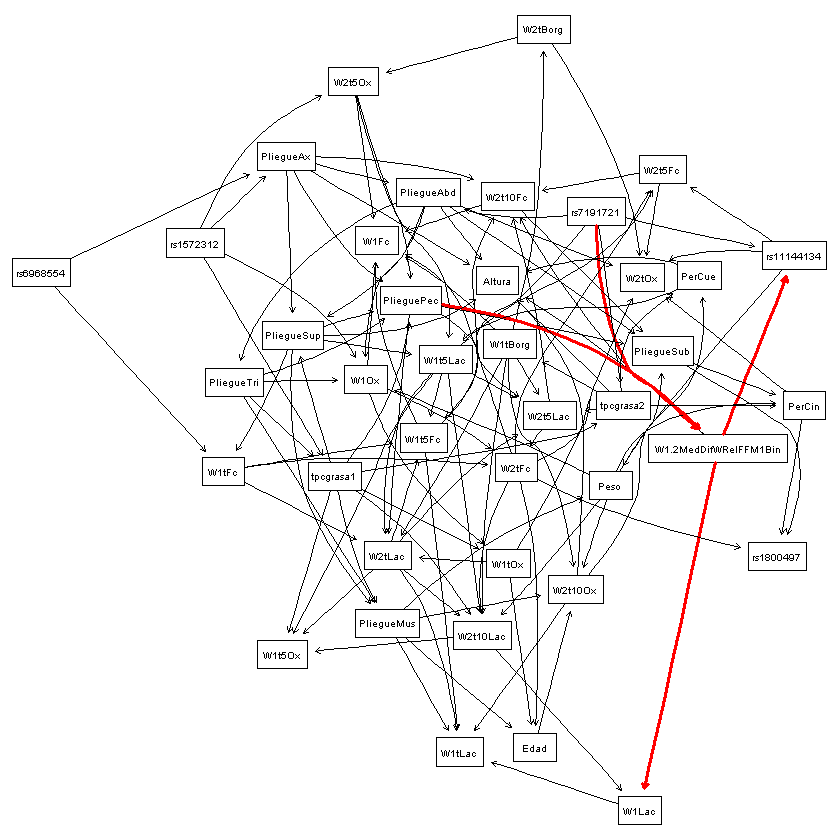

In [23]:
#graph_tabu = graphviz.plot(tabu,  layout = 'fdp', shape = 'rectangle')
hl <- list(arcs = arcs, lwd = 3, col = "red")
graph_tabu <- graphviz.plot(tabu,layout = 'fdp', shape = 'rectangle', highlight = hl)

## Conditional probabilities <a class="anchor" id="6"></a>

* [Returning to the index of contents](#index)

In order to obtain the conditional probabilities of the graph generated by tabu algorithm, we need to give the tabu model a probability format:

In [24]:
tabu_fitted <- bn.fit(model2network(modelstring(tabu)),ind_med, method = 'bayes')

### Conditional probabilities for  W1.2MedDifWRelFFM1Bin = 0<a class="anchor" id="7"></a>

* [Returning to the index of contents](#index)

We calculate the conditioned probabilities that given a state of a predictor, the state 0 of the target variable happens.

In [25]:
W1Lac_0_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (W1Lac == "0"))))[1]
W1Lac_1_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (W1Lac == "1"))))[1]
rs11144134_CT_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs11144134 == 'C:T'))))[1]
rs11144134_TT_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs11144134 == 'T:T'))))[1]
PlieguePec_0_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (PlieguePec == "0"))))[1]
PlieguePec_1_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (PlieguePec == "1"))))[1]
rs7191721_AA_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'A:A'))))[1]
rs7191721_AG_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'A:G'))))[1]
rs7191721_GG_prob = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'G:G'))))[1]

Now, we create a probability table:

In [26]:
names(W1Lac_0_prob) <- 'W1Lac=0'
names(W1Lac_1_prob) <- 'W1Lac=1'
names(rs11144134_CT_prob)<- 'rs11144134=C:T'
names(rs11144134_TT_prob)<- 'rs11144134=T:T'
names(PlieguePec_0_prob) <- 'PlieguePec=0'
names(PlieguePec_1_prob) <- 'PlieguePec=1'
names(rs7191721_AA_prob) <- 'rs7191721=A:A'
names(rs7191721_AG_prob) <- 'rs7191721=A:G'
names(rs7191721_GG_prob) <- 'rs7191721=G:G'

In [27]:
W1.2MedDifWRelFFM1Bin_0 <- c(W1Lac_0_prob,W1Lac_1_prob,rs11144134_CT_prob,rs11144134_TT_prob,PlieguePec_0_prob,
                        PlieguePec_1_prob,rs7191721_AA_prob,rs7191721_AG_prob,rs7191721_GG_prob)

In [28]:
W1.2MedDifWRelFFM1Bin_0

W1Lac=0        W1Lac=1 rs11144134=C:T rs11144134=T:T   PlieguePec=0 
     0.6795455      0.3385023      0.2458647      0.5927116      0.6865258 
  PlieguePec=1  rs7191721=A:A  rs7191721=A:G  rs7191721=G:G 
     0.3129669      0.2889785      0.6513561      0.4524331

In [29]:
df <-data.frame(names(W1.2MedDifWRelFFM1Bin_0),W1.2MedDifWRelFFM1Bin_0)
names(df) <- c('Predictors_states','frequency')

In [30]:
rownames(df) <- NULL
df

Predictors_states,frequency
W1Lac=0,0.6795455
W1Lac=1,0.3385023
rs11144134=C:T,0.2458647
rs11144134=T:T,0.5927116
PlieguePec=0,0.6865258
PlieguePec=1,0.3129669
rs7191721=A:A,0.2889785
rs7191721=A:G,0.6513561
rs7191721=G:G,0.4524331


We save the data of the probability table to be represented in a barplot:

In [32]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [33]:
g_plot_var_0 <- ggplot(df, aes(x = Predictors_states, y = frequency, fill = Predictors_states)) + geom_bar(stat = "identity")

In [34]:
g_plot_var_0 <- g_plot_var_0 + ggtitle('Frequency of W1.2MedDifWRelFFM1=0') +
  xlab('Predictor states') + ylab('Frecuency of W1.2MedDifWRelFFM1Bin')+
  theme(
        axis.text.x=element_blank(),plot.title = element_text(size=12))+ guides(fill=guide_legend(title="Predictor states"))

### Conditional probabilities for  W1.2MedDifWRelFFM1Bin = 1<a class="anchor" id="8"></a>

* [Returning to the index of contents](#index)

We calculate the conditioned probabilities that given a state of a predictor, the state 0 of the target variable happens.

In [35]:
W1Lac_0_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (W1Lac == "0"))))[2]
W1Lac_1_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (W1Lac == "1"))))[2]
rs11144134_CT_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs11144134 == 'C:T'))))[2]
rs11144134_TT_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs11144134 == 'T:T'))))[2]
PlieguePec_0_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (PlieguePec == "0"))))[2]
PlieguePec_1_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",evidence = (PlieguePec == "1"))))[2]
rs7191721_AA_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'A:A'))))[2]
rs7191721_AG_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'A:G'))))[2]
rs7191721_GG_prob_2 = prop.table(table(cpdist(tabu_fitted, nodes = "W1.2MedDifWRelFFM1Bin",
                                            evidence = (rs7191721 == 'G:G'))))[2]

Now, we create a probability table:

In [36]:
names(W1Lac_0_prob_2) <- 'W1Lac=0'
names(W1Lac_1_prob_2) <- 'W1Lac=1'
names(rs11144134_CT_prob_2)<- 'rs11144134=C:T'
names(rs11144134_TT_prob_2)<- 'rs11144134=T:T'
names(PlieguePec_0_prob_2) <- 'PlieguePec=0'
names(PlieguePec_1_prob_2) <- 'PlieguePec=1'
names(rs7191721_AA_prob_2) <- 'rs7191721=A:A'
names(rs7191721_AG_prob_2) <- 'rs7191721=A:G'
names(rs7191721_GG_prob_2) <- 'rs7191721=G:G'

In [37]:
variable_objetivo_1 <- c(W1Lac_0_prob_2,W1Lac_1_prob_2,rs11144134_CT_prob_2,rs11144134_TT_prob_2,PlieguePec_0_prob_2,
                        PlieguePec_1_prob_2,rs7191721_AA_prob_2,rs7191721_AG_prob_2,rs7191721_GG_prob_2)

In [38]:
variable_objetivo_1

W1Lac=0        W1Lac=1 rs11144134=C:T rs11144134=T:T   PlieguePec=0 
     0.3165672      0.6618897      0.7554745      0.4147675      0.3191602 
  PlieguePec=1  rs7191721=A:A  rs7191721=A:G  rs7191721=G:G 
     0.6891820      0.7083899      0.3545028      0.5526891

In [39]:
df2 <-data.frame(names(variable_objetivo_1),variable_objetivo_1)
names(df2) <- c('Predictors_states','frequency')

In [40]:
rownames(df2) <- NULL
df2

Predictors_states,frequency
W1Lac=0,0.3165672
W1Lac=1,0.6618897
rs11144134=C:T,0.7554745
rs11144134=T:T,0.4147675
PlieguePec=0,0.3191602
PlieguePec=1,0.6891820
rs7191721=A:A,0.7083899
rs7191721=A:G,0.3545028
rs7191721=G:G,0.5526891


We save the data of the probability table to be represented in a barplot:

In [41]:
g_plot_var_1 <- ggplot(df2, aes(x = Predictors_states, y = frequency, fill = Predictors_states)) + geom_bar(stat = "identity")

In [42]:
g_plot_var_1 <- g_plot_var_1 + ggtitle('Frequency of W1.2MedDifWRelFFM1=1') +
  xlab('Predictor states') + ylab('Frecuency of W1.2MedDifWRelFFM1Bin')+
  theme(
        axis.text.x=element_blank(),plot.title = element_text(size=12))+ guides(fill=guide_legend(title="Predictor states"))

We put together all the information:

In [43]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.2"

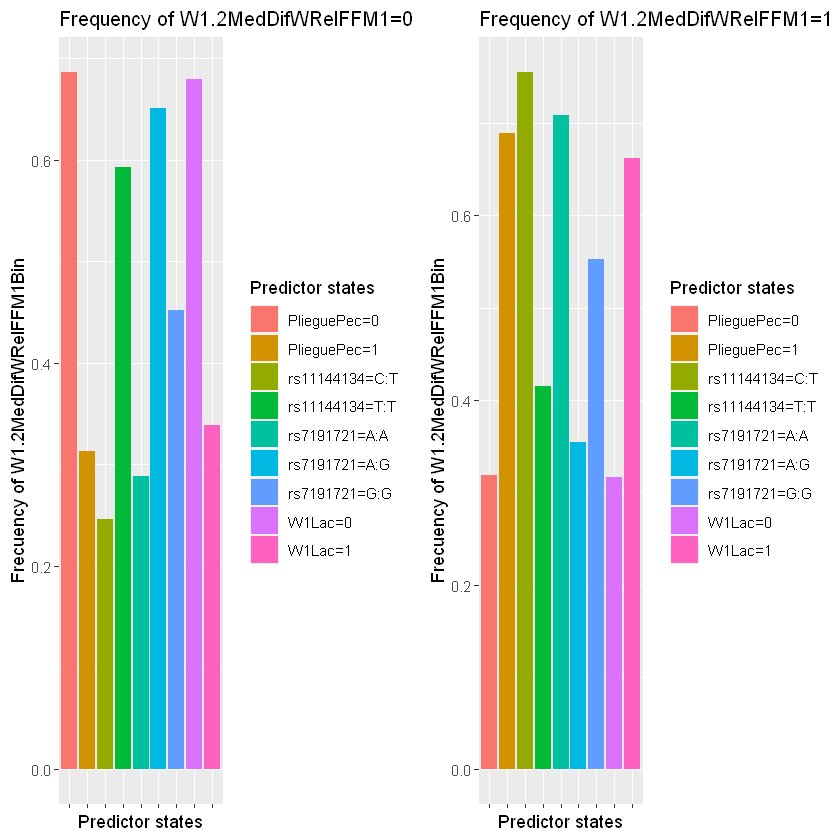

In [46]:
grid.arrange(g_plot_var_0, g_plot_var_1, nrow = 1)